In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('zomato_dataset.csv')

In [3]:
df.shape

(123657, 12)

In [4]:
df['City'].nunique()

17

In [5]:
jaipur_data = df[df['City'] == ' Jaipur']

In [6]:
jaipur_data = jaipur_data.dropna()
jaipur_data.isnull().sum()

Restaurant Name    0
Dining Rating      0
Delivery Rating    0
Dining Votes       0
Delivery Votes     0
Cuisine            0
Place Name         0
City               0
Item Name          0
Best Seller        0
Votes              0
Prices             0
dtype: int64

In [7]:
jaipur_data.columns

Index(['Restaurant Name', 'Dining Rating', 'Delivery Rating', 'Dining Votes',
       'Delivery Votes', 'Cuisine ', 'Place Name', 'City', 'Item Name',
       'Best Seller', 'Votes', 'Prices'],
      dtype='object')

In [8]:
jaipur_data

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
45497,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Cappuccino,BESTSELLER,20,185.00
45499,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Brrrista Blast Cold Coffee,BESTSELLER,11,290.00
45500,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Penne Arrabiata Pasta - DYN,BESTSELLER,11,230.00
45501,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Garden Fresh Pizza - DYN,BESTSELLER,21,230.00
45502,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Cafe Latte,BESTSELLER,8,195.00
...,...,...,...,...,...,...,...,...,...,...,...,...
77608,Burger Shack,3.9,4.2,78,0,Beverages,C Scheme,Jaipur,Peri Peri Fries,BESTSELLER,29,115.00
77610,Burger Shack,3.9,4.2,78,0,Beverages,C Scheme,Jaipur,Pizza Pockets (Pack Of 3),BESTSELLER,45,99.00
77611,Burger Shack,3.9,4.2,78,0,Beverages,C Scheme,Jaipur,"Aloo Tikki Wrap ( 8"" Wrap)",BESTSELLER,126,95.00
77621,Burger Shack,3.9,4.2,78,0,Beverages,C Scheme,Jaipur,Chocolate Shake (250 Ml),BESTSELLER,24,125.00


In [9]:
jaipur_data['Place Name'].unique()

array(['C Scheme', 'Pink City', 'Shastri Nagar', 'Raja Park', 'Gopalpura',
       'Sindhi Camp', 'Jhotwara', 'Axis Mall', 'Malviya Nagar',
       'Vaishali Nagar', 'Sodala', 'Lal Kothi', 'Vidhyadhar Nagar',
       'Mansarovar', 'Brahmpuri', 'Khatipura Road', 'MI Road',
       'Tonk Phatak', 'Sikar Road', 'Amer Road', 'Durgapura', 'Gopalbari',
       'Ajmer Highway', 'Masala Chowk', 'Crystal Palm Mall',
       'Pink Square Mall'], dtype=object)

In [10]:
jaipur_data['Votes'].describe()

count    2774.000000
mean       76.667628
std       160.763742
min         0.000000
25%         6.000000
50%        22.000000
75%        72.000000
max      1754.000000
Name: Votes, dtype: float64

In [11]:
class outliers:

    def __init__(self, df):
        self.df = df

    def DeleteOutliers(self, column_name):
        Q1 = self.df[column_name].quantile(0.25)
        Q3 = self.df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + (1.5*IQR)
        lower_bound = Q1 - (1.5*IQR)
        self.df.reset_index(drop=True, inplace=True)
        outliers = self.df[(self.df[column_name] < lower_bound) | (self.df[column_name] > upper_bound)]
        self.df = self.df.drop(outliers.index)
        return self.df

In [12]:
outlier_remover = outliers(jaipur_data)

In [13]:
cleaned_df = outlier_remover.DeleteOutliers('Votes')
cleaned_df = outlier_remover.DeleteOutliers('Prices')

<Axes: xlabel='Prices'>

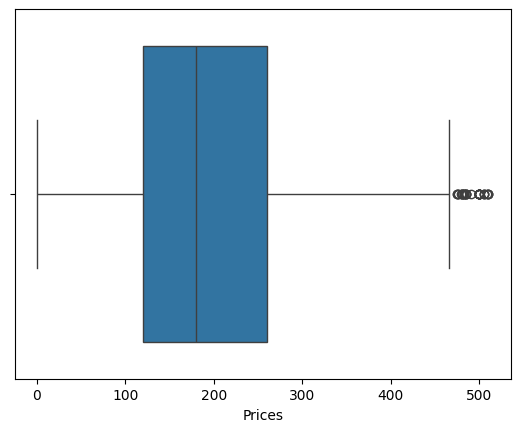

In [14]:
import seaborn as sns
sns.boxplot(cleaned_df['Prices'], orient='h')

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform the 'Best Seller' column in jaipur_data
cleaned_df['Best Seller'] = label_encoder.fit_transform(cleaned_df['Best Seller'])

In [16]:
def ordinal_encoding_rating(rating):
    if rating >= 4.0:
        return 2
    elif 3.2 <= rating < 4.0:
        return 1
    else:
        return 0

cleaned_df.loc[:, 'Dining Rating'] = cleaned_df['Dining Rating'].apply(ordinal_encoding_rating)
cleaned_df.loc[:, 'Delivery Rating'] = cleaned_df['Delivery Rating'].apply(ordinal_encoding_rating)

In [17]:
dining = cleaned_df[['Dining Rating','Dining Votes']]
delivery = cleaned_df[['Delivery Rating','Delivery Votes']]

In [18]:
covariance_matrix_dining = np.cov([dining.iloc[:,0], dining.iloc[:,1]])
covariance_matrix_delivery = np.cov([delivery.iloc[:,0], delivery.iloc[:,1]])

In [19]:
eigen_values_dining, eigen_vectors_dining = np.linalg.eig(covariance_matrix_dining)
eigen_values_delivery, eigen_vectors_delivery = np.linalg.eig(covariance_matrix_delivery)

In [20]:
pc = eigen_vectors_dining[0:1]
pc1 = eigen_vectors_delivery[0:1]

In [21]:
transformed_dining = np.dot(dining.iloc[:,:], pc.T)
transformed_delivery = np.dot(delivery.iloc[:,:], pc1.T)
new_dining = pd.DataFrame(transformed_dining, columns = ['Dining Rate'])
new_delivery = pd.DataFrame(transformed_delivery, columns = ['Delivery Rate'])

In [22]:
cleaned_df = cleaned_df.drop(columns=['Dining Rating', 'Dining Votes', 'Delivery Rating', 'Delivery Votes'])
cleaned_df["Dining Rate"] = new_dining["Dining Rate"]
cleaned_df["Delivery Rate"] = new_delivery["Delivery Rate"]

In [23]:
desired_order = ['Restaurant Name', 'Dining Rate', 'Delivery Rate', 'Cuisine ',
       'Place Name', 'City', 'Item Name', 'Best Seller', 'Votes', 'Prices']
cleaned_df = cleaned_df[desired_order]

In [24]:
cleaned_df = cleaned_df.dropna()
cleaned_df.isnull().sum()

Restaurant Name    0
Dining Rate        0
Delivery Rate      0
Cuisine            0
Place Name         0
City               0
Item Name          0
Best Seller        0
Votes              0
Prices             0
dtype: int64

In [25]:
cleaned_df

,Restaurant Name,Dining Rate,Delivery Rate,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Barista Coffee,-1.991169,-1.730414,Desserts,C Scheme,Jaipur,Cappuccino,0,20,185.0
1,Barista Coffee,-1.991169,-1.730414,Desserts,C Scheme,Jaipur,Brrrista Blast Cold Coffee,0,11,290.0
2,Barista Coffee,-1.991169,-1.730414,Desserts,C Scheme,Jaipur,Penne Arrabiata Pasta - DYN,0,11,230.0
3,Barista Coffee,-1.991169,-1.730414,Desserts,C Scheme,Jaipur,Garden Fresh Pizza - DYN,0,21,230.0
4,Barista Coffee,-1.991169,-1.730414,Desserts,C Scheme,Jaipur,Cafe Latte,0,8,195.0
...,...,...,...,...,...,...,...,...,...,...
2315,Pizza Hut,-0.996883,-2.000000,Beverages,MI Road,Jaipur,Masala Keema Garlic Bread,4,0,189.0
2316,Pizza Hut,-0.996883,-2.000000,Beverages,MI Road,Jaipur,Classic BreadStix,4,26,119.0
2317,Pizza Hut,-0.996883,-2.000000,Beverages,MI Road,Jaipur,Creamy BreadStix,4,48,169.0
2318,Pizza Hut,-0.996883,-2.000000,Beverages,MI Road,Jaipur,Cheese Garlic Bread,0,46,159.0


**1. Predicting Dining Rating:**

In [26]:
# Preprocess the data
X = cleaned_df.drop(columns = ['Restaurant Name', 'Place Name'])
y = cleaned_df.iloc[:,1]

In [27]:
y

0      -1.991169
1      -1.991169
2      -1.991169
3      -1.991169
4      -1.991169
          ...   
2315   -0.996883
2316   -0.996883
2317   -0.996883
2318   -0.996883
2319   -0.996883
Name: Dining Rate, Length: 2223, dtype: float64

In [28]:
# Encode categorical variables if necessary
X = pd.get_dummies(X, drop_first = True)

In [29]:
X

,Dining Rate,Delivery Rate,Best Seller,Votes,Prices,Cuisine _Beverages,Cuisine _Biryani,Cuisine _Burger,Cuisine _Chinese,Cuisine _Desserts,...,Item Name_White Sauce Pasta,Item Name_White Sauce Veg Pasta,Item Name_Whole Fish Roasted,Item Name_World Special Pizza,Item Name_Yam Dumi Pizza [Single Layer],Item Name_Yellow Dal Tadka,Item Name_Yummy Burger,Item Name_Zesty Paneer Pocket,Item Name_Zing Chicken Burger,Item Name_cheese King Kong Burger
0,-1.991169,-1.730414,0,20,185.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,-1.991169,-1.730414,0,11,290.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,-1.991169,-1.730414,0,11,230.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,-1.991169,-1.730414,0,21,230.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,-1.991169,-1.730414,0,8,195.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,-0.996883,-2.000000,4,0,189.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2316,-0.996883,-2.000000,4,26,119.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2317,-0.996883,-2.000000,4,48,169.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2318,-0.996883,-2.000000,0,46,159.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [31]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [34]:
from sklearn.metrics import r2_score, mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 0.035796760364293904
R2 Score: 0.8996975339007667


Heat Map for the Entire Data Set

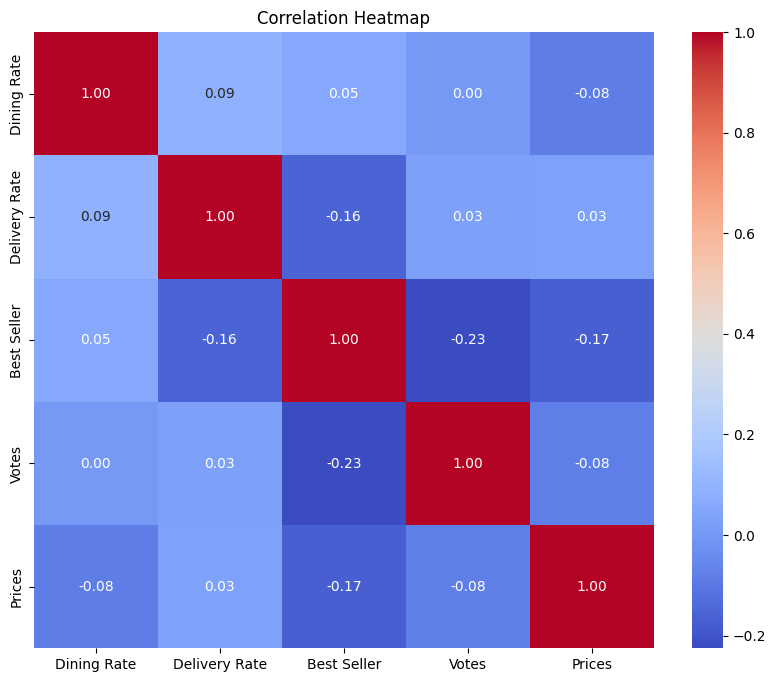

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

cleaned_df = cleaned_df.drop(['Restaurant Name','Cuisine ', 'Place Name', 'City', 'Item Name'],axis = 1)

corr_matrix  = cleaned_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


Learning Curve showing the model's performance as a function of training data size therefor aiding in the assessment of whether the model would benefit from additional training data or if it has already reached its maximum performance.

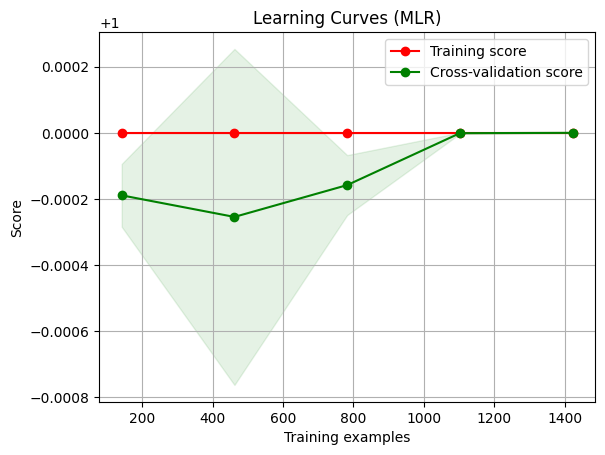

In [42]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,train_sizes=np.linspace(.1, 1.0, 5)):


  plt.figure()
  plt.title(title)
  if ylim is not None:
      plt.ylim(*ylim)
  plt.xlabel("Training examples")
  plt.ylabel("Score")
  train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")

  plt.legend(loc="best")
  return plt

title = "Learning Curves (MLR)"
estimator = LinearRegression()
plot_learning_curve(estimator, title, X_train, y_train, cv=5)
plt.show()